In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wine_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\PCA\\wine.csv")
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#EDA

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# there are no null values in the data set

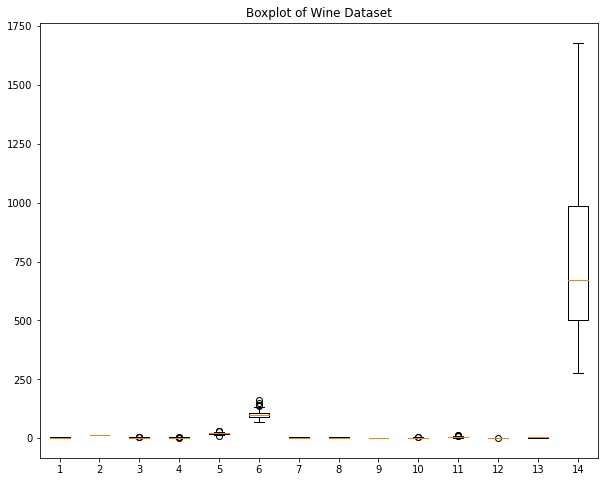

In [5]:
plt.figure(figsize=(10,8))
plt.boxplot(wine_df)
plt.title("Boxplot of Wine Dataset")
plt.show()


In [6]:
# There are not many outliers in the data set

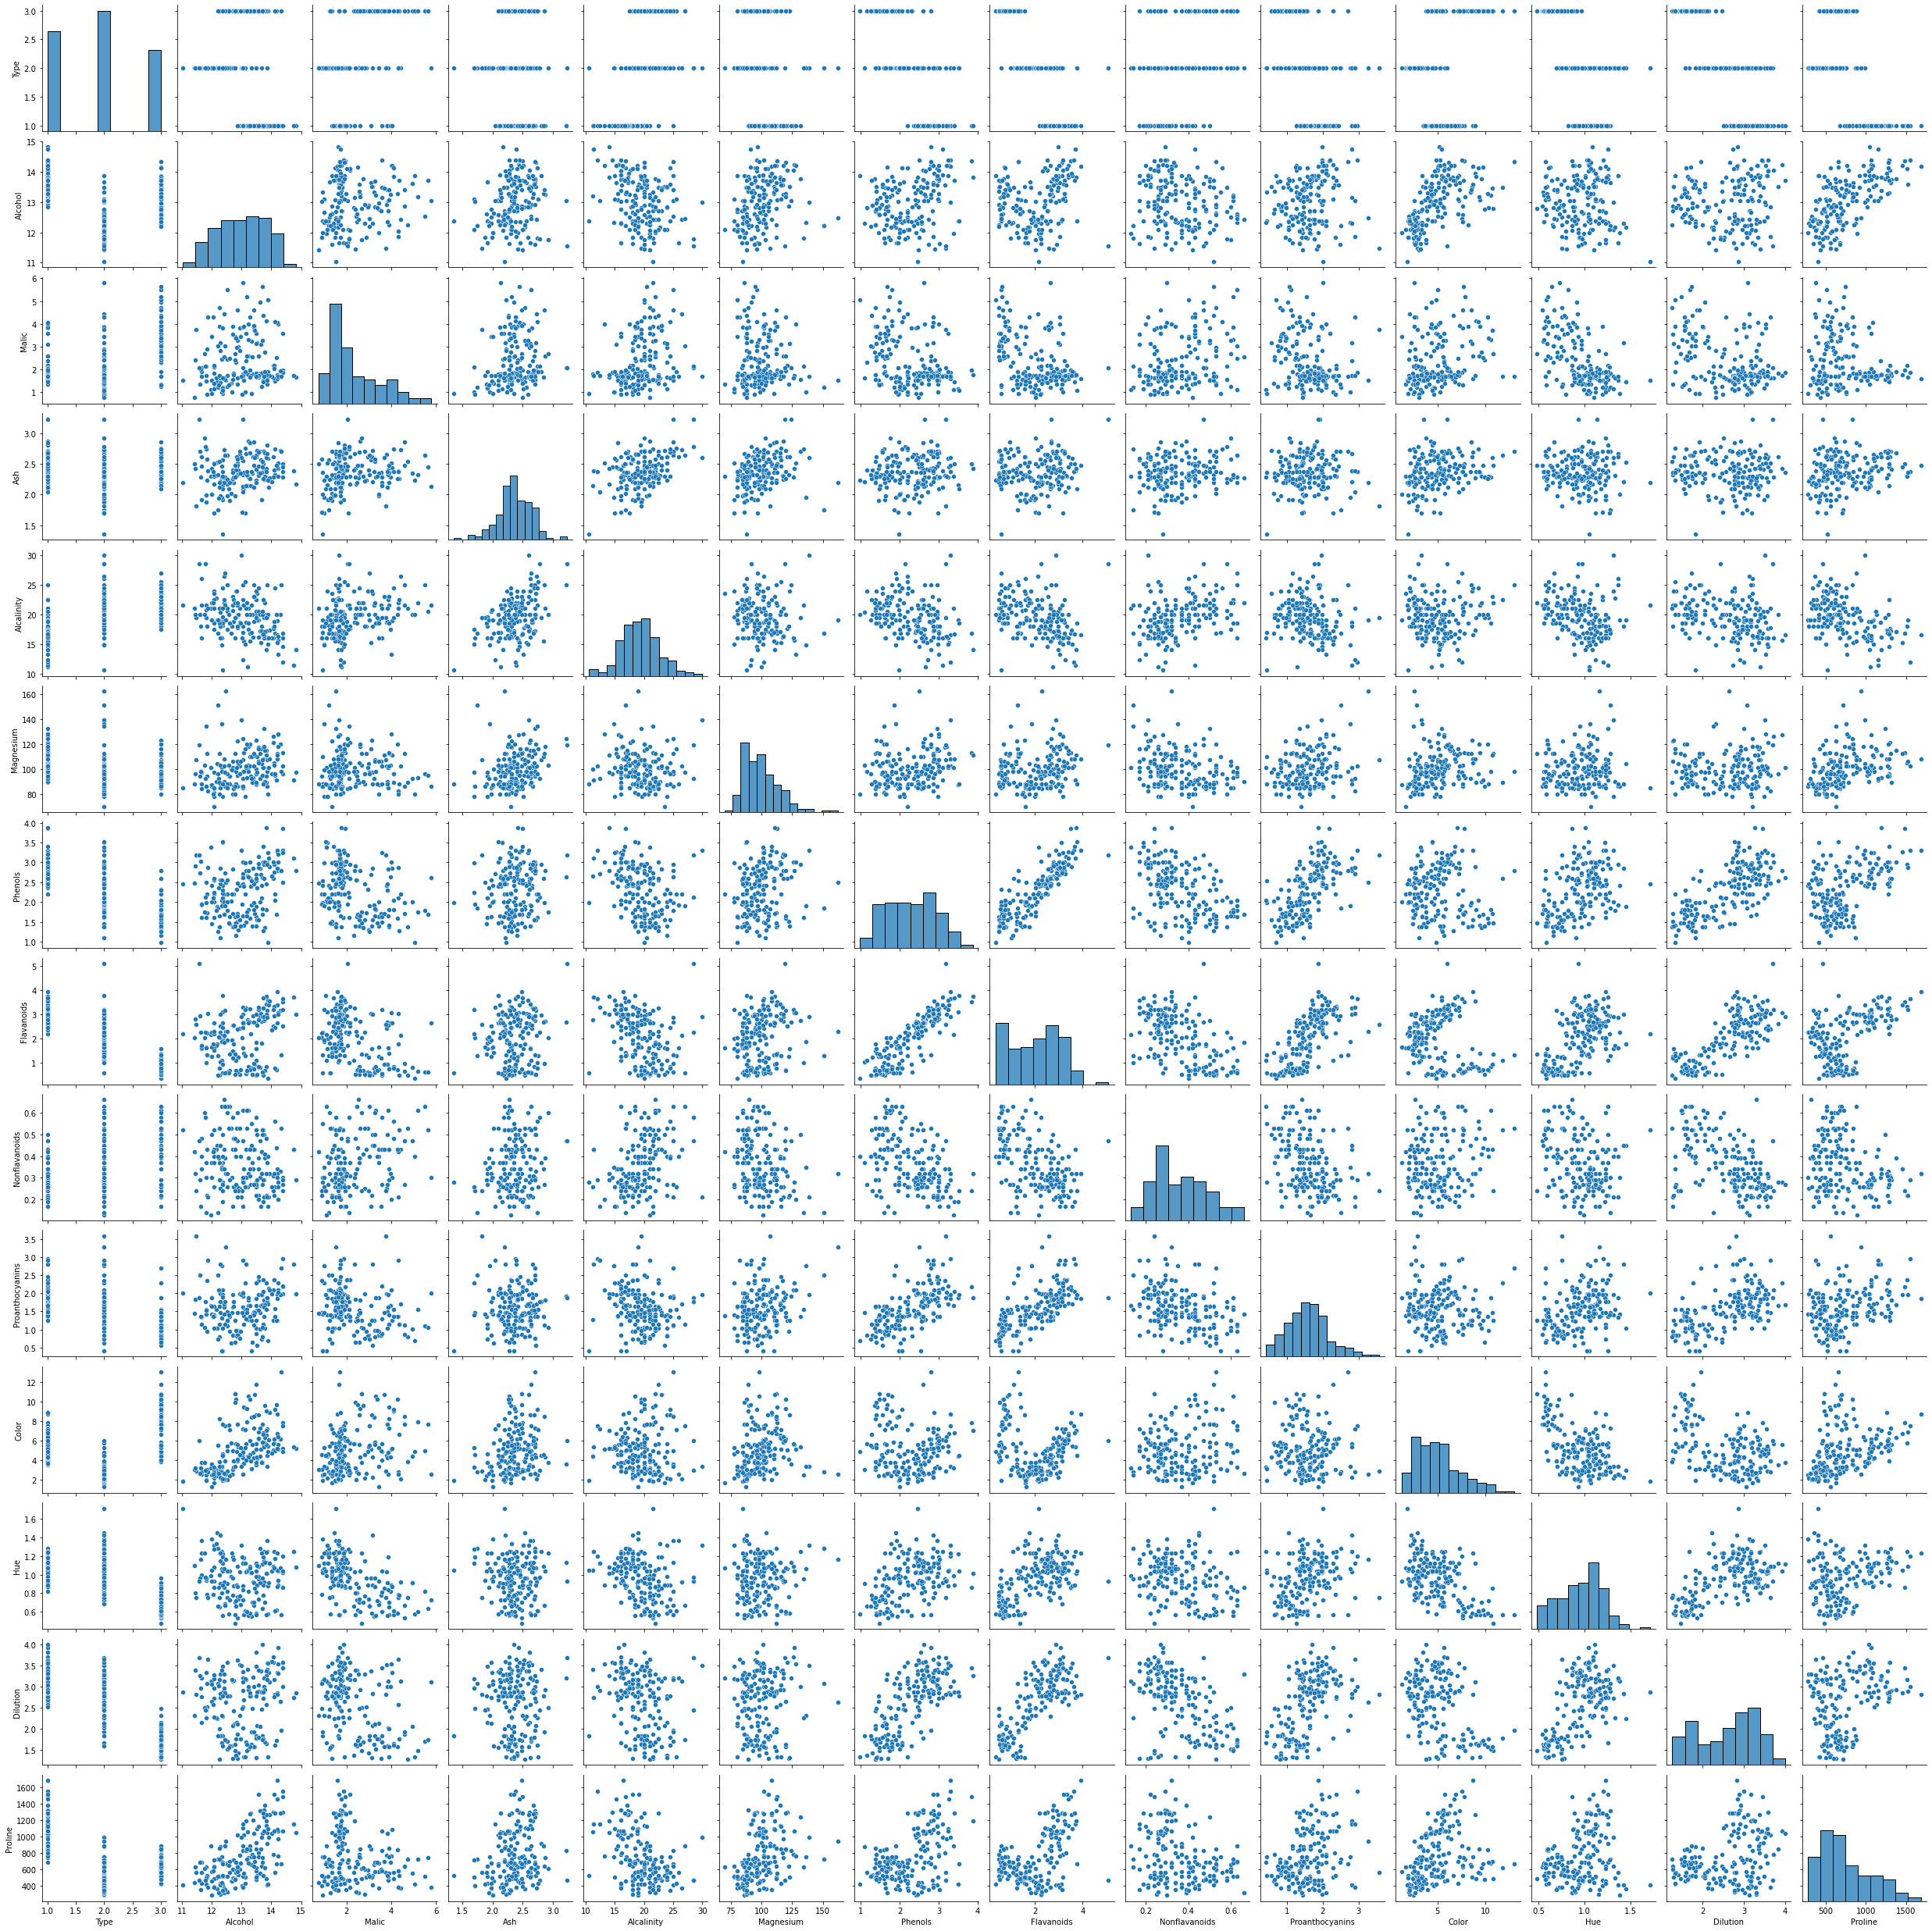

In [7]:
sns.pairplot(wine_df)

In [8]:
# Since there are many dimensions in the data set , we will use correlation coefficient to find the relation between the columns

<AxesSubplot:>

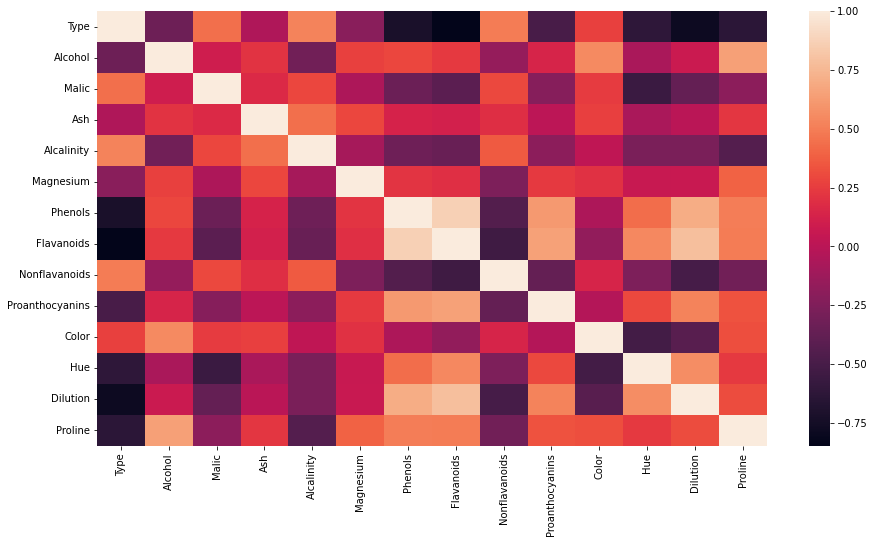

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data=wine_df.corr())

In [10]:
# There are few dimensions with large correlation.

#PRE-PROCESSING DATA

In [11]:
# Normal Scaling

In [12]:
from sklearn.preprocessing import scale
wine_df_norm=scale(wine_df)

In [13]:
wine_df_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
# MIN MAX SCALER

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(wine_df)
wine_df_minmax=scaler.transform(wine_df)

In [16]:
wine_df_minmax

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

# DIMENSIONS REDUCTION - PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA()
pc_values=pca.fit_transform(wine_df_norm)

In [19]:
pc_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

<AxesSubplot:>

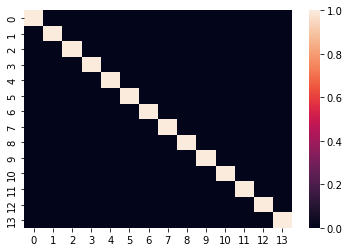

In [20]:
# There is no correlation between the pc's calculated
sns.heatmap(pd.DataFrame(pc_values).corr())

In [21]:
# 3 PC's calculation
pca=PCA(n_components=3)
pc_values=pca.fit_transform(wine_df_norm)

In [22]:
pc=pd.DataFrame(pc_values,columns=['pc1','pc2','pc3'])
pc

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [23]:
# Variance 
var=pca.explained_variance_ratio_

In [24]:
var

array([0.39542486, 0.17836259, 0.10329102])

In [25]:
#Data points covered in each pc's
dataCovered=np.round(var,3)
dataCovered

array([0.395, 0.178, 0.103])

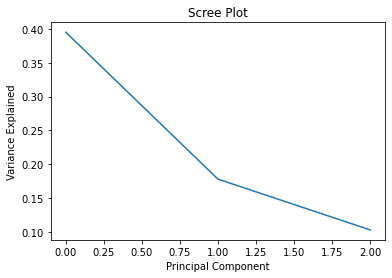

In [26]:
plt.plot(dataCovered)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Hierarchieal Clustering

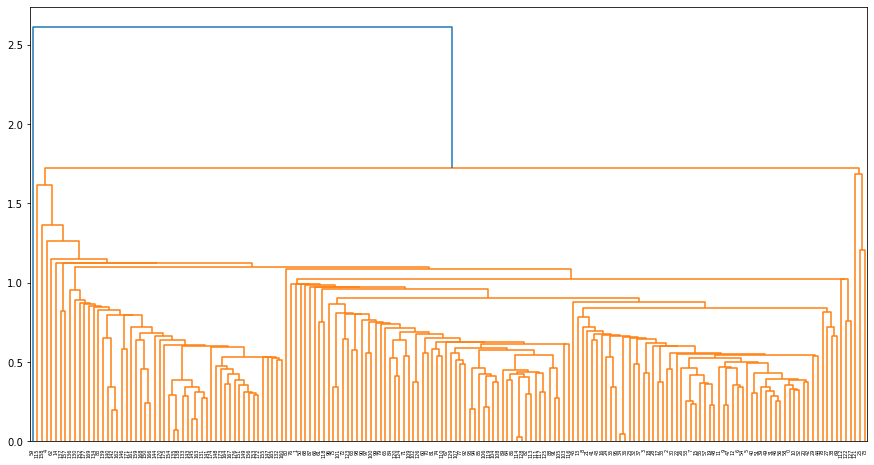

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(pc_values,method='single'))

In [28]:
# single linkage has 2 clusters but most of the data is put into one cluster only.

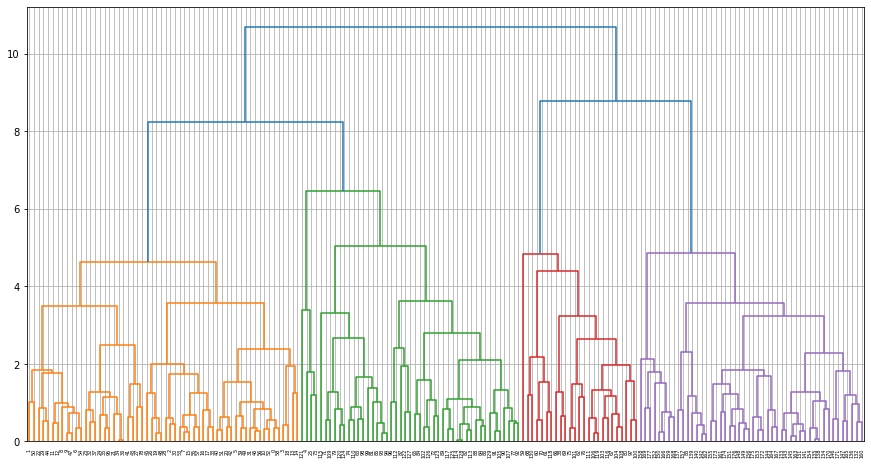

In [29]:
plt.figure(figsize=(15,8))
complete=sch.dendrogram(sch.linkage(pc_values,method='complete'))
plt.grid()

In [30]:
#complete linkage has 4 clusters which is equally distributed if we cut the tree at 8

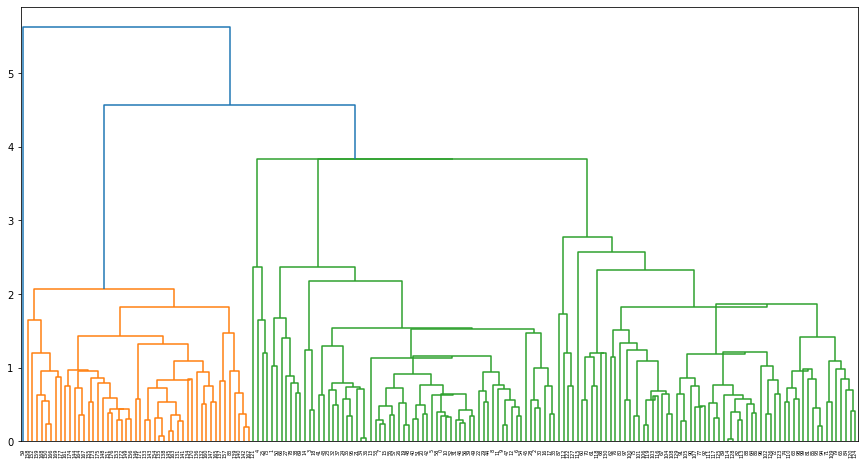

In [31]:
plt.figure(figsize=(15,8))
centroid=sch.dendrogram(sch.linkage(pc_values,method='centroid'))

In [32]:
# Centroid linkage has 2 clusters unevenly distributed

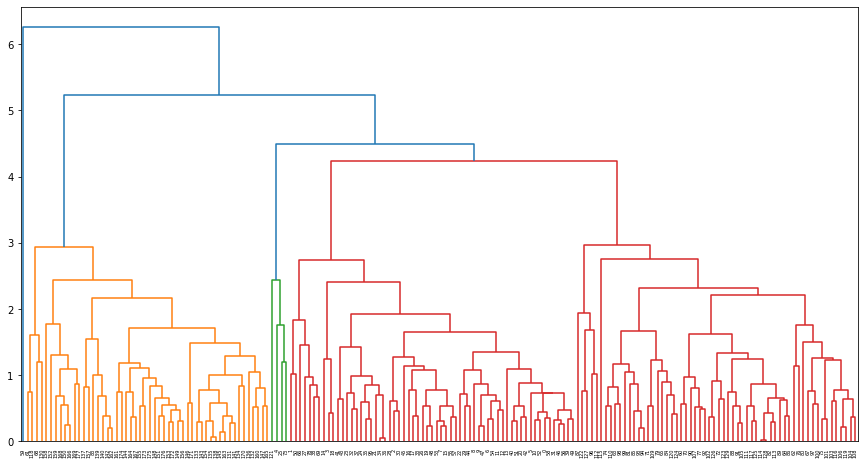

In [33]:
plt.figure(figsize=(15,8))
average=sch.dendrogram(sch.linkage(pc_values,method='average'))

In [34]:
# In average linkage has 3 clusters

In [35]:
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
cluster.fit_predict(pc_values)

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [36]:
data_scaled = pd.DataFrame(wine_df_minmax, columns=wine_df.columns)
data_scaled.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [37]:
wine_df['ClusterID_Hiera']=cluster.labels_

In [38]:
wine_df.groupby('ClusterID_Hiera').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClusterID_Hiera,,,,,,,,,,,,,,
0,1.957447,12.219787,2.109787,2.430000,21.672340,94.595745,2.382128,2.286809,0.372766,1.730426,3.045745,1.052979,2.898511,513.936170
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000
2,2.000000,12.473200,1.567200,1.968400,17.660000,93.840000,2.068400,1.752400,0.334800,1.312400,3.236000,1.062240,2.587600,549.720000
3,1.034483,13.730690,1.982759,2.428276,16.853448,107.448276,2.830000,2.966724,0.286897,1.948103,5.527069,1.060862,3.145345,1119.465517


<AxesSubplot:xlabel='ClusterID_Hiera', ylabel='count'>

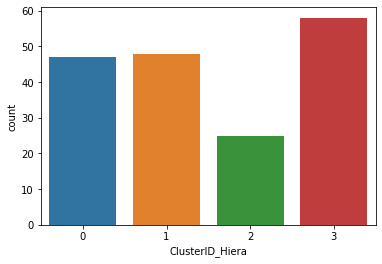

In [39]:
# No of data points covered in each cluster
sns.countplot(x='ClusterID_Hiera',data=wine_df)

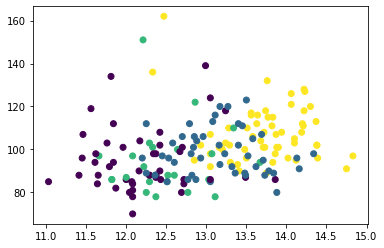

In [40]:
#plt.figure(figsize=(10,8))
plt.scatter(wine_df['Alcohol'], wine_df['Magnesium'], c=cluster.labels_)

In [ ]:
# In 2D plot the clusters seem to be overlaping .So, we will use 3D plot.

Text(0.5, 0, 'PC3')

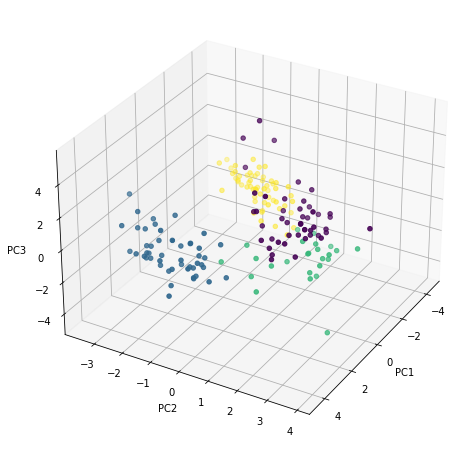

In [41]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter3D(pc['pc1'],pc['pc2'],pc['pc3'],c=cluster.labels_)
ax.view_init(30, 30)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [42]:
# Using 3D plot to observe the clusters formed 

# K Means clustering

In [43]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pc_values)
    wcss.append(kmeans.inertia_)

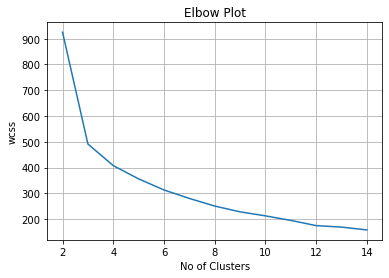

In [44]:
plt.plot(range(2,15),wcss)
plt.title("Elbow Plot")
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.grid()

In [45]:
# From the elbow plot we can say that 3 clusters can be formed

In [46]:
# Silhouette scores

from sklearn import metrics
sc=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pc_values)
    sc.append(metrics.silhouette_score(pc_values,kmeans.labels_))

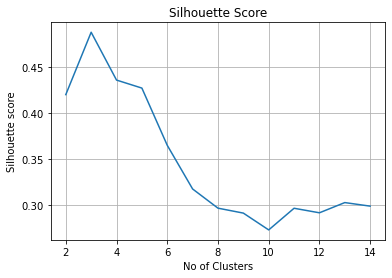

In [47]:
plt.plot(range(2,15),sc)
plt.title("Silhouette Score")
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette score")
plt.grid()

In [48]:
# Silhouette score is maximum for 3rd cluster
# SO , in KMeans clustering we can have THREE clusters

In [49]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(pc_values)
wine_df['ClusterID_kmeans']=kmeans.labels_

In [50]:
wine_df.groupby('ClusterID_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterID_Hiera
ClusterID_kmeans,,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.790323
1,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955,0.731343
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,1.020408


<AxesSubplot:xlabel='ClusterID_kmeans', ylabel='count'>

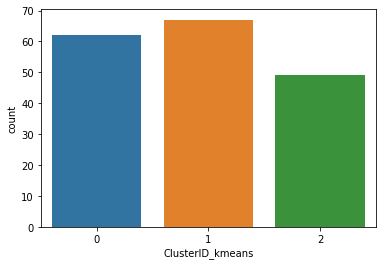

In [52]:
sns.countplot(x='ClusterID_kmeans',data=wine_df)

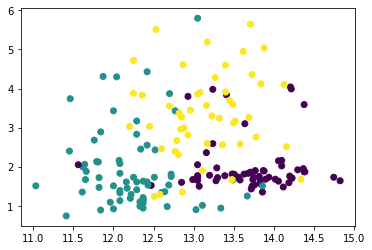

In [53]:
plt.scatter(wine_df['Alcohol'],wine_df['Malic'],c=kmeans.labels_)

In [54]:
# Using 3D plot to observe clusters formed

Text(0.5, 0, 'PC3')

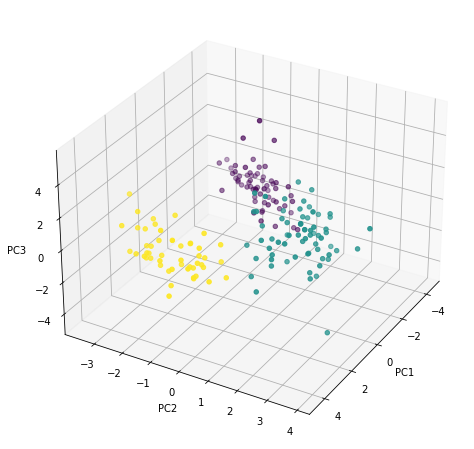

In [55]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter3D(pc['pc1'],pc['pc2'],pc['pc3'],c=kmeans.labels_)
ax.view_init(30, 30)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# In Hierarchieal cluster we have 4 clusters and in KMeans we have 3 clusters

# DBSCAN -Clustering

In [66]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(wine_df_norm)
distances, indices = nbrs.kneighbors(wine_df_norm)

In [67]:
distances[0:5]

array([[0.        , 1.28789316],
       [0.        , 1.85735601],
       [0.        , 1.93229732],
       [0.        , 1.73866279],
       [0.        , 1.91835868]])

Text(0.5, 1.0, 'NearestDistance')

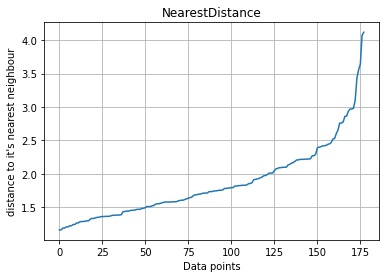

In [73]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlabel("Data points")
plt.ylabel("distance to it's nearest neighbour")
plt.title('NearestDistance')

In [74]:
# Since the curve has changed at 2.5 , let's take epsilon as 2.5 and min samples as the no. of dimensions

In [75]:
from sklearn.cluster import DBSCAN
db_scan=DBSCAN(eps=2.5,min_samples=15)
db_scan.fit(wine_df_norm)

DBSCAN(eps=2.5, min_samples=15)

In [76]:
pd.Series(db_scan.labels_).value_counts()

 0    92
-1    53
 1    33
dtype: int64

<AxesSubplot:ylabel='count'>

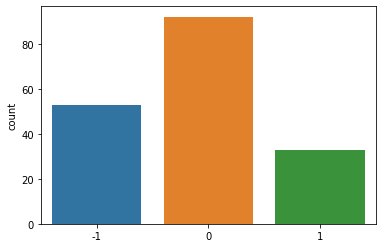

In [77]:
# No. of data points in each cluster
sns.countplot(x=db_scan.labels_,data=wine_df)

In [ ]:
# Viewing the data after assigning the clusters 

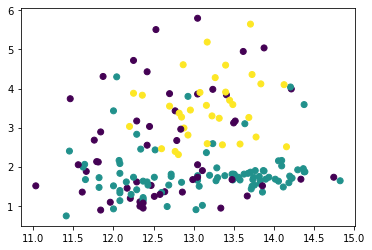

In [78]:
plt.scatter(wine_df['Alcohol'],wine_df['Malic'],c=db_scan.labels_)

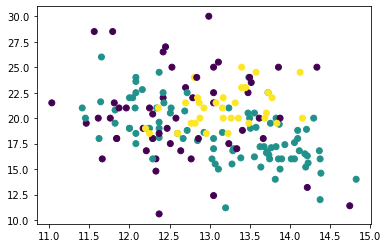

In [79]:
plt.scatter(wine_df['Alcohol'],wine_df['Alcalinity'],c=db_scan.labels_)

In [86]:
# Viewing the cluster formation for PC's

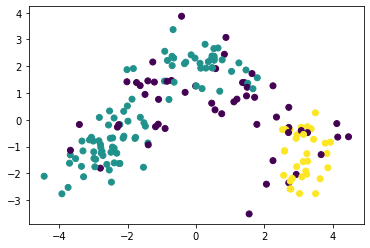

In [87]:
plt.scatter(pc['pc1'],pc['pc2'],c=db_scan.labels_)

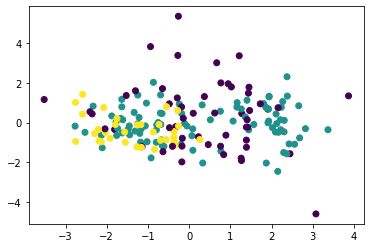

In [88]:
plt.scatter(pc['pc2'],pc['pc3'],c=db_scan.labels_)

In [89]:
# 3D plot for PC's and CLustering

Text(0.5, 0, 'PC3')

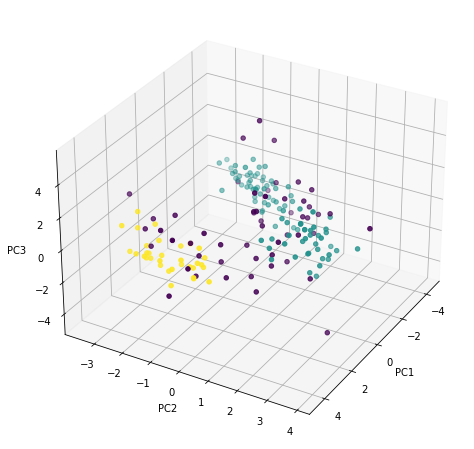

In [90]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter3D(pc['pc1'],pc['pc2'],pc['pc3'],c=db_scan.labels_)
ax.view_init(30, 30)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [85]:
# In DBSCAN we get arbitrarily shaped clusters as 3 clusters were formed